# **<center><font style="color:rgb(100,109,254)">Module 1: Creating a Live Gesture Control Application</font> </center>**

<img src='https://drive.google.com/uc?export=download&id=10xY6U-4CecBuMkbONZp6bPx7BAZB6xfX'>

## **<font style="color:rgb(134,19,348)"> Module Outline </font>**

The module can be split into the following parts:

- *Lesson 1: Introduction to hand landmark detection theory*

- *Lesson 2:* Create a Hands Landmarks Detector

- *Lesson 3:* Build a Hands Fingers Counter

- *Lesson 4:* Build a Hand Gesture Recognizer 

- *Lesson 5:* Distance measurement

- ***Lesson 6:* Brightness, Saturation, Contrast Enhancement & Gamma Correction** *(This Tutorial)*

- *Lesson 7:* Build the Final Application

**Please Note**, these Jupyter Notebooks are not for sharing; do read the Copyright message below the Code License Agreement section which is in the last cell of this notebook.
-Taha Anwar

Alright, let's get started.

### **<font style="color:rgb(134,19,348)"> Import the Libraries</font>**

First we will import the required libraries.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## **<font style="color:rgb(134,19,348)">Create a Change Brightness and Saturation Function</font>**

It’s no secret that brightness is the overall lightness or darkness of an image, whereas saturation, on the other hand, refers to the intensities of the colors in the image. Now that we understood what brightness and saturation are, let's move on to modifying them.

We will create a function **`changeSatValue()`** that will increase/decrease the Saturation or Brightness of an image and will visualize the resultant image along with the original image or return the resultant image depending upon the passed arguments.

We will first convert the image from **`BGR`** to **`HSV`** format using the function [**`cv2.cvtColor()`**](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab), then we will simply modify the saturation or value channel. During the process, we will also need the [**`cv2.split()`**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga8027f9deee1e42716be8039e5863fbd9) and [**`cv2.merge()`**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga61f2f2bde4a0a0154b2333ea504fab1d) functions to divide and  combine the channels of the image.

**RGB Color Space**

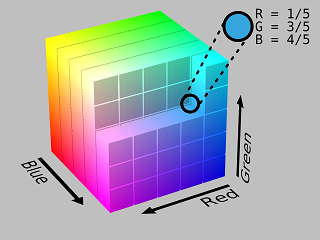

**HSV Color Space**

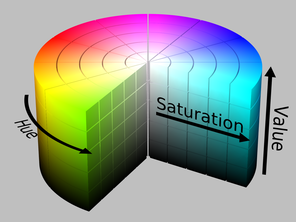

In [4]:
def changeSatValue(image, scale_factor, channel, display=True):
    '''
    This function will increase/decrease the Saturation or Brighness of an image.
    Args:
        image:        The image whose Saturation or Brighness is to be changed.
        scale_factor: A number that will multiply/scale the required channel of the image.
        channel:      The channel either Saturation or Value whose needed to be modified.
        display:      A boolean value that is if set to true the function displays the original image,
                      and the output image with the modified Saturation or Brighness and returns nothing.
    Returns:
        output_image: A copy of the input image with the Saturation or Brighness modified.
        
    '''
    
    # Convert the image from BGR into HSV format.
    image_hsv = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2HSV)
    
    # Convert the pixel values of the image into float.
    image_hsv = np.array(image_hsv, dtype=np.float64)
    
    # Split the hue, saturation, and value channel of the image.
    hue_channel, saturation_channel, value_channel = cv2.split(image_hsv)
    
    # Check if the channel that is needed to be changed is Saturation.
    if channel == 'Saturation':
        
        # Scale up or down the pixel values of the channel utilizing the scale factor.
        saturation_channel *= scale_factor
    
    # Check if the channel that is needed to be changed is Value.  
    elif channel == 'Value':
        
        # Scale up or down the pixel values of the channel utilizing the scale factor.
        value_channel *= scale_factor
    
    # Merge the Hue, Saturation, and Value channel.
    image_hsv = cv2.merge((hue_channel, saturation_channel, value_channel))
    
    # Set values > 255 to 255.
    image_hsv[image_hsv > 255] = 255
    
    # Set values < 0 to 0.
    image_hsv[image_hsv < 0] = 0
    
    # Convert the image into uint8 type and BGR format.
    output_image = cv2.cvtColor(np.array(image_hsv, dtype=np.uint8), cv2.COLOR_HSV2BGR) 
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Sample Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    # Otherwise
    else:

        # Return the output image.
        return output_image

Now we will utilize the function **`changeSatValue()`** to change the Saturation and Brightness of a few sample images and display the results.

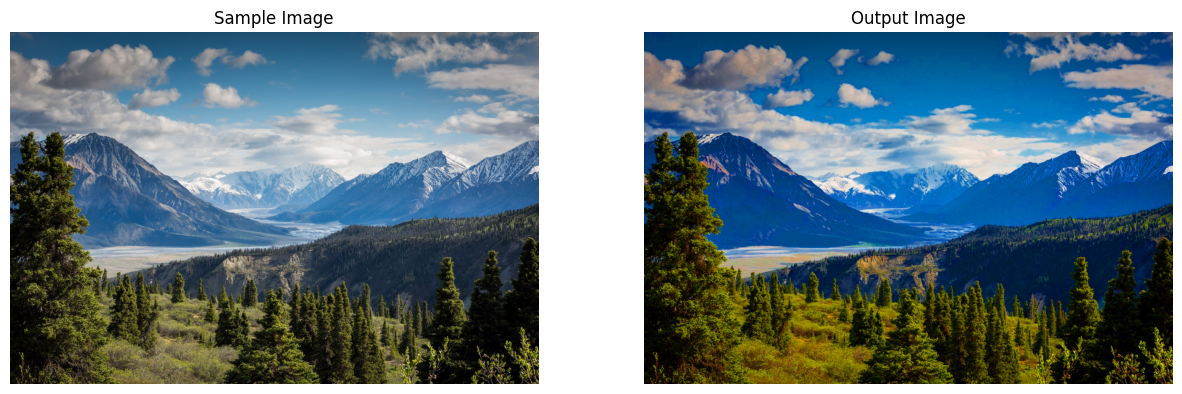

In [5]:
# Read a sample image and change its saturation.
image = cv2.imread('media/sample8.jpg')
changeSatValue(image, scale_factor=3, channel='Saturation', display=True)

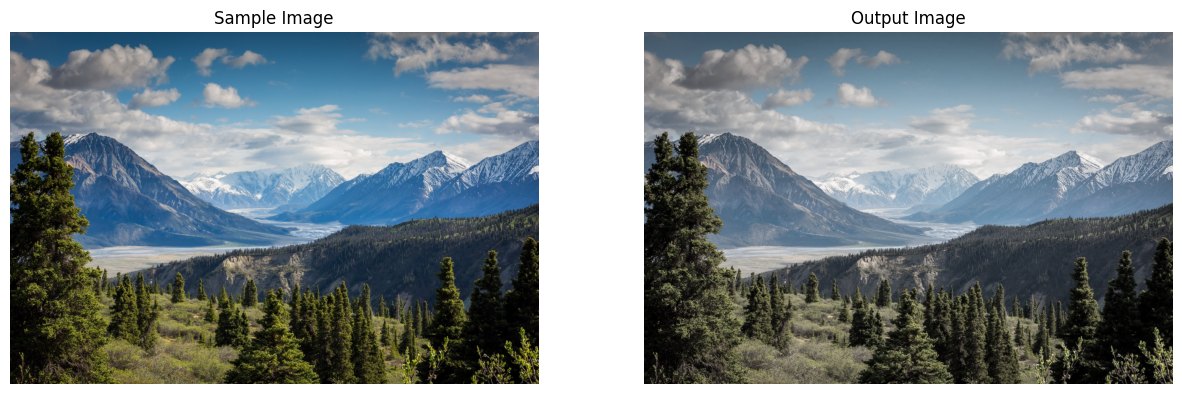

In [6]:
# Read another sample image and change its saturation.
image = cv2.imread('media/sample8.jpg')
changeSatValue(image, scale_factor=0.5, channel='Saturation', display=True)

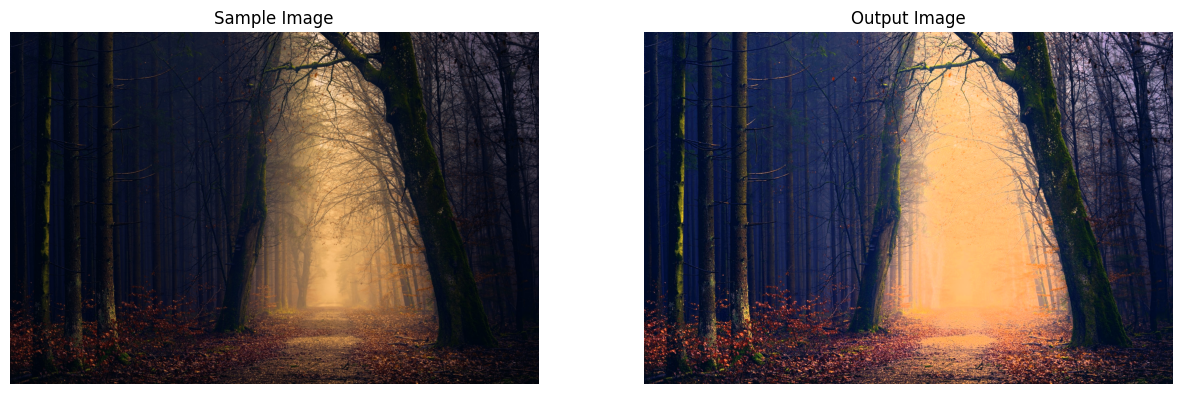

In [7]:
# Read a sample image and change its brighness.
image = cv2.imread('media/sample9.jpg')
changeSatValue(image, scale_factor=2, channel='Value', display=True)

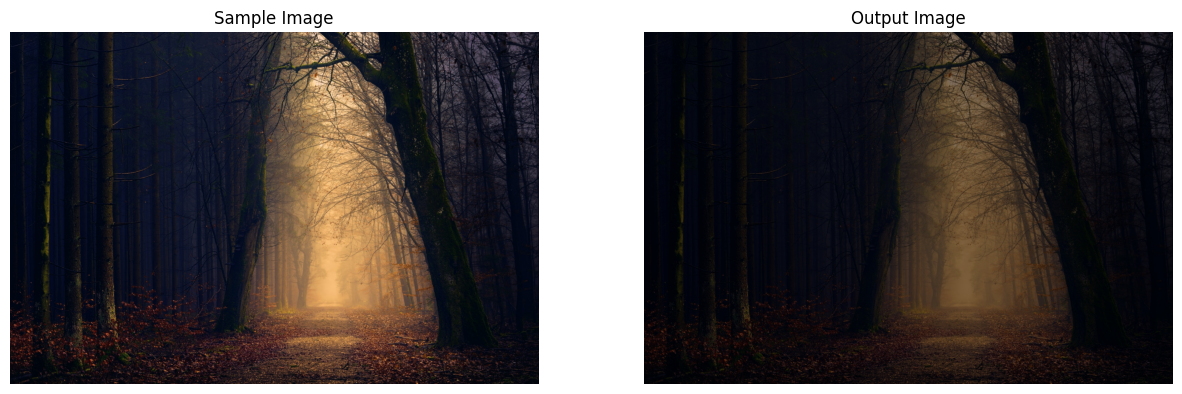

In [8]:
# Read another sample image and change its brighness.
image = cv2.imread('media/sample9.jpg')
changeSatValue(image, scale_factor=0.5, channel='Value', display=True)

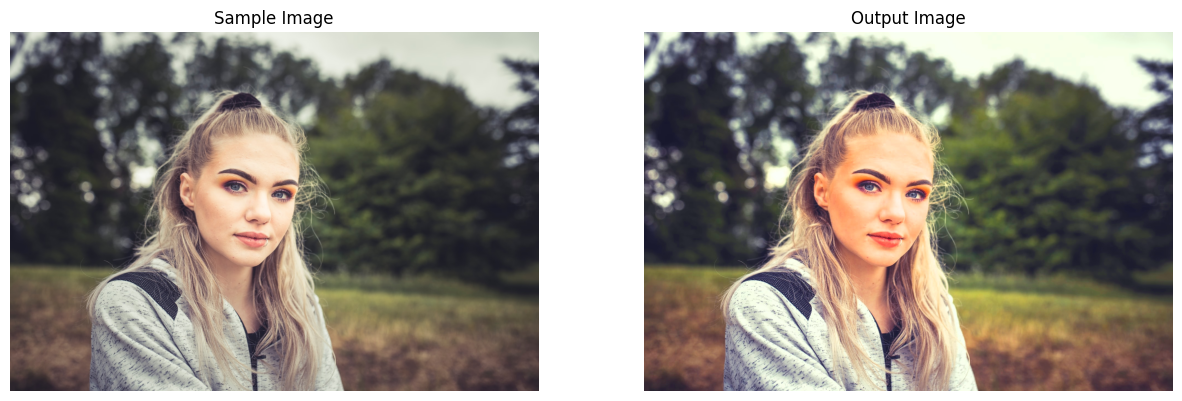

In [9]:
# Read another sample image and change its saturation and brighness.
image = cv2.imread('media/sample10.jpg')
output_image = changeSatValue(image, scale_factor=1.4, channel='Saturation', display=False)
output_image = changeSatValue(output_image, scale_factor=1.2, channel='Value', display=False)

# Display the original input image and the output image.
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Sample Image");plt.axis('off');
plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');

Cool! right? I bet you still can't believe that we have achieved these interesting effects with that simple code.

## **<font style="color:rgb(134,19,348)">Create a Change Contrast Function</font>**

Before moving on to modifying the contrast, let's first understand what it is. In simple words, it can be defined as the difference between the brightest and darkest parts of an image. Now let's move to the modifying part, for this we will create a function **`changeContrast()`** that will modify the Contrast of an image and will visualize the resultant image along with the original image or return the resultant image depending upon the passed arguments. 

To change the contrast, we will use the function [**`cv2.convertScaleAbs()`**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ga3460e9c9f37b563ab9dd550c4d8c4e7d) that will simply multiply the image pixel values with the **`scale_factor`** `[1.0, 3.0]`, and convert the resultant image into an (abs) unsigned 8-bit type. So greater the **`scale_factor`** is, the lesser the difference between the brightest and darkest parts will become.

In [10]:
def changeContrast(image, scale_factor, display=True):
    '''
    This function will modify the Contrast of an image.
    Args:
        image:        The image whose Contrast is to be changed.
        scale_factor: A number that will scale the Contrast of the image.
        display:      A boolean value that is if set to true the function displays the original image,
                      and the output image with the modified Contrast and returns nothing.
    Returns:
        output_image: A copy of the input image with the Contrast modified.
        
    '''
    
    # Change the contrast of a copy of the image.
    output_image = cv2.convertScaleAbs(image.copy(), alpha=float(scale_factor), beta=0)
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Sample Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    # Otherwise
    else:
    
        # Return the output image.
        return output_image

Now we will check the function **`changeContrast()`** to change the Contrast of a few sample images and display the results.

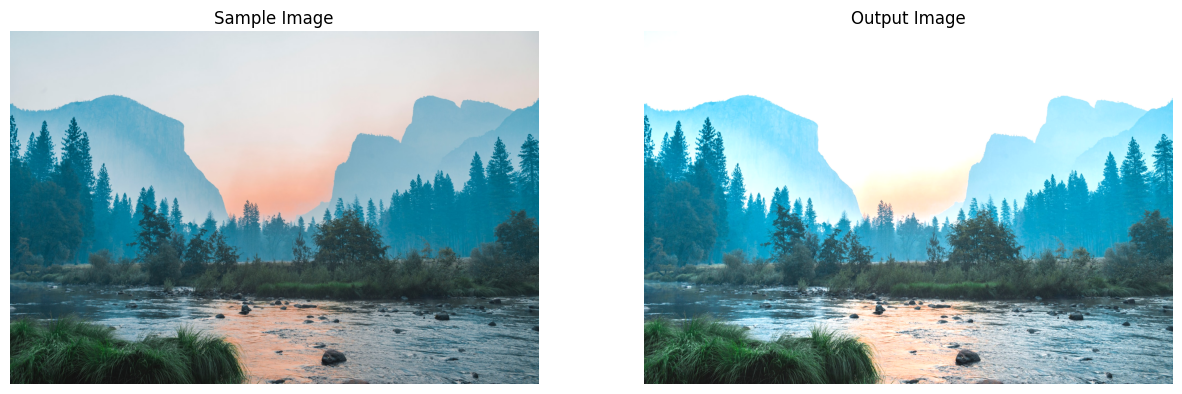

In [11]:
# Read a sample image and change its contrast.
image = cv2.imread('media/sample7.jpg')
changeContrast(image, scale_factor=1.3)

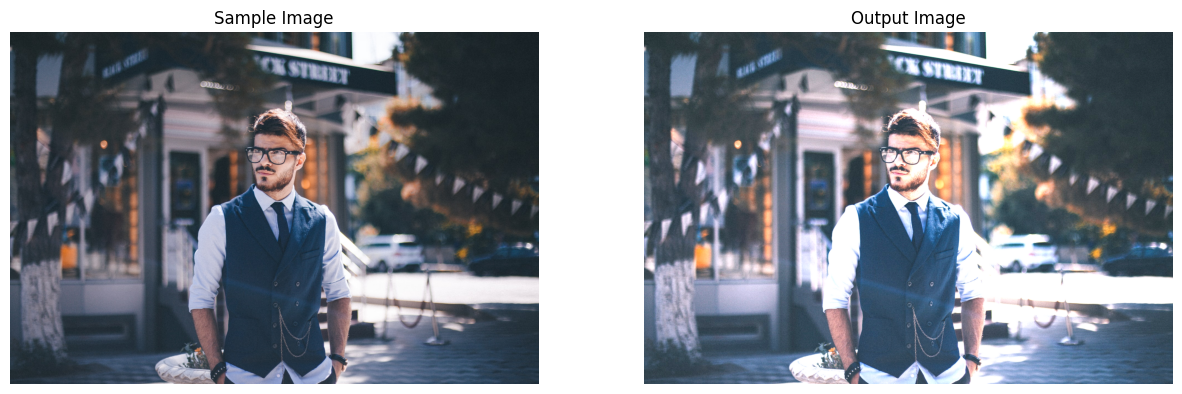

In [12]:
# Read another sample image and change its contrast.
image = cv2.imread('media/sample12.jpg')
changeContrast(image, scale_factor=1.5)

Hurrah! it's working the way we wanted. But an issue with the three approaches to change Brightness, Contrast, and Saturation we learned about, is that they all are linear which means those operations can sometimes make some parts of the image look either too light or too dark.

## **<font style="color:rgb(134,19,348)">Create a Gamma Correction Function</font>**

Now We will create a function **`gammaCorrection()`** that will perform a nonlinear operation also known as the Power Law Transform, used to correct the brightness by utilizing the following equation:

$$ O = \left( \frac{I}{255} \right)^{\gamma} \times 255 $$


Here $ \gamma < 1 $  will make the image brighter while $ \gamma > 1 $  will make the image look darker.

Now to perform the operation, we will first construct a table mapping all the possible input pixel values (0 to 255) to their output gamma-corrected values utilizing the above equation and then we will transform the image pixels to their corresponding corrected values by looking up in the table using the function [**`cv2.LUT()`**](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f).

**Note:** *This operation is different than the previous ones as it is non-linear so it affects the regions of an image differently depending upon their original values.* 

In [14]:
def gammaCorrection(image, scale_factor, display=True):
    '''
    This function will perform the Gamma Correction of an image.
    Args:
        image:        The image on which Gamma Correction is to be performed.
        scale_factor: A number that will be used to calculate the required gamma value.
        display:      A boolean value that is if set to true the function displays the original image,
                      and the output image and returns nothing.
    Returns:
        output_image: A copy of the input image with the gamma corrected. 
    '''
    
    # Calculate the gamma value from the passed scale factor. 
    gamma = 1.0/scale_factor
    
    # Initialize the look-up table of 256 elements with values zero.
    table = np.zeros(shape=(1,256), dtype=np.uint8)
    
    # Iterate the number of times equal to the number of columns (256) of the look-up table.
    for i in range(table.shape[1]):
        
        # Calculate the value of the ith column of the look-up table.
        # And clip (limit) the values between 0 and 255.
        table[0,i] = np.clip(a=pow(i/255.0, gamma)*255.0, a_min=0, a_max=255)
    
    # Perform look-up table transform of the image.
    output_image = cv2.LUT(image, table)
    
    # Check if the original input image and the output image are specified to be displayed.
    if display:
        
        # Display the original input image and the output image.
        plt.figure(figsize=[15,15])
        plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Sample Image");plt.axis('off');
        plt.subplot(122);plt.imshow(output_image[:,:,::-1]);plt.title("Output Image");plt.axis('off');
        
    # Otherwise.
    else:
    
        # Return the output image.
        return output_image

Now we will perform gamma correction on a few sample images utilizing the function **`gammaCorrection()`** created above.

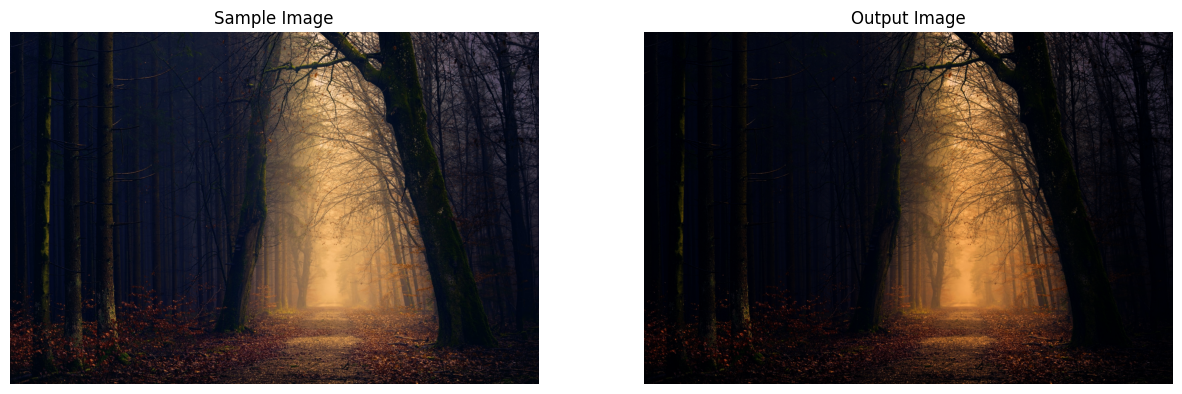

In [15]:
# Read a sample image and perform gamma correction on it.
image = cv2.imread('media/sample9.jpg')
gammaCorrection(image, scale_factor=0.7)

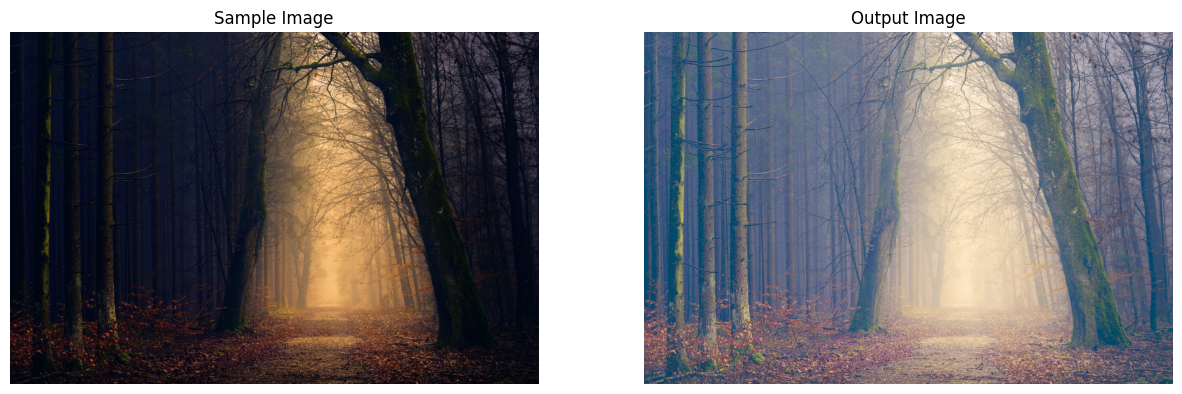

In [16]:
# Read a sample image and change its contrast.
image = cv2.imread('media/sample9.jpg')
gammaCorrection(image, scale_factor=3)

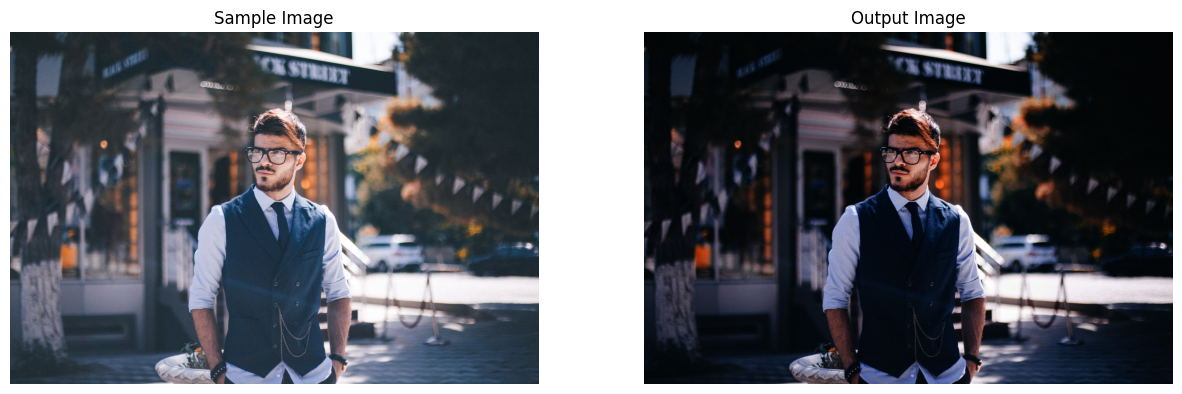

In [17]:
# Read another sample image and change its contrast.
image = cv2.imread('media/sample12.jpg')
gammaCorrection(image, scale_factor=0.5)

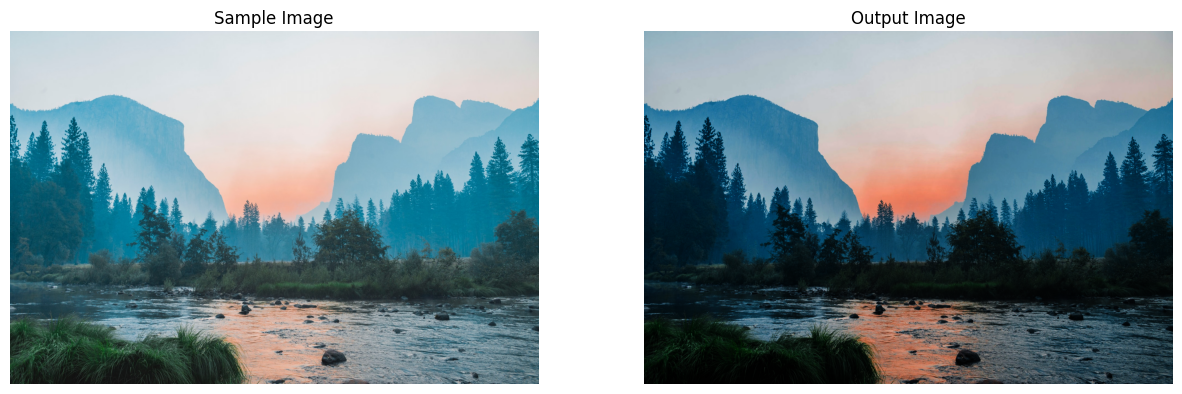

In [18]:
# Read another sample image and change its contrast.
image = cv2.imread('media/sample7.jpg')
gammaCorrection(image, scale_factor=0.5)

You should have noticed that this operation has affected the regions of the images differently. 

## **<font style="color:rgb(134,19,348)"> Change Saturation, Brightness, Contrast, and Gamma Correction On Real-Time Webcam Feed/Video</font>**

Now lets check how these four operations effect webcam feed in real-time.

In [21]:
# Initialize the VideoCapture object to read from the webcam.
camera_video = cv2.VideoCapture(0)

# Remove thse
#camera_video.set(3,1280)
#camera_video.set(4,960)

# Create named window for resizing purposes.
cv2.namedWindow('Webcam Feed Window', cv2.WINDOW_NORMAL)

# Create the function for the trackbar since its mandatory.
# This function is called whenever trackbar changes it's position.
def nothing(x):
    pass

# Create trackbar named Brighness with the range [0-300].
cv2.createTrackbar('Brightness','Webcam Feed Window', 100, 300, nothing) 

# Create trackbar named Saturation with the range [0-300].
cv2.createTrackbar('Saturation', 'Webcam Feed Window', 100, 300, nothing) 

# Create trackbar named Contrast with the range [0-200].
cv2.createTrackbar('Contrast', 'Webcam Feed Window', 0, 200, nothing) 

# Create trackbar named Gamma Correction with the range [0-300].
cv2.createTrackbar('Gamma Correction', 'Webcam Feed Window', 100, 300, nothing) 

# Initialize some variables to store the scale factors. 
brightness_scale = saturation_scale = contrast_scale = gamma_scale = 1

# Iterate until the webcam is accessed successfully.
while camera_video.isOpened():
    
    # Read a frame.
    ok, frame = camera_video.read()
    
    # Check if frame is not read properly then continue to the next iteration to read the next frame.
    if not ok:
        continue
        
    # Get the height and width of the frame of the webcam video.
    frame_height, frame_width, _ = frame.shape
    
    # Flip the frame horizontally for natural (selfie-view) visualization.
    frame = cv2.flip(frame, 1)
    
    # Get the value of the brighness from the trackbar.
    brightness_scale = cv2.getTrackbarPos('Brightness','Webcam Feed Window')/100
        
    # Change the brighness of the frame. 
    frame = changeSatValue(frame, scale_factor=brightness_scale, channel='Value', display=False)
    
    # Get the value of the saturation from the trackbar.
    saturation_scale = cv2.getTrackbarPos('Saturation','Webcam Feed Window')/100
    
    # Change the saturation of the frame. 
    frame = changeSatValue(frame, scale_factor=saturation_scale, channel='Saturation', display=False) 
    
    # Get the value of the contrast from the trackbar.
    contrast_scale = cv2.getTrackbarPos('Contrast','Webcam Feed Window')/100 + 1
        
    # Change the contrast of the frame. 
    frame = changeContrast(frame, scale_factor=contrast_scale, display=False)
    
    # Get the value of the gamma correction from the trackbar.
    gamma_scale = cv2.getTrackbarPos('Gamma Correction','Webcam Feed Window')/100 + 0.1
    
    # Perform gamma correction on the frame. 
    frame = gammaCorrection(frame, scale_factor=gamma_scale, display=False)
                
    # Display the frame.
    cv2.imshow('Webcam Feed Window', frame)
    
    # Wait for 1ms. If a key is pressed, retreive the ASCII code of the key.
    k = cv2.waitKey(1) & 0xFF
    
    # Check if 'ESC' is pressed and break the loop.
    if(k == 27):
        break

# Release the VideoCapture Object and close the windows.
camera_video.release()
cv2.destroyAllWindows()


# Additional comments:
#       - Saturation adjustment, Brightness, and contrast are all
#         linear. What this means is that the entire image will
#         be scaled on the same level.
#       - As for the gamma, it is non-linear which means that the
#         adjustment on the pixel will be determined by the formula.
#         The formula will compensate for the lack of something...
#         if an ROI of an image is a lot more bleached than the rest,
#         the gamma correction will compensante and adjust it accordingly.

Great! each operation is working smoothly.

### **<font style="color:rgb(255,140,0)"> Code License Agreement </font>**
```
Copyright (c) 2022 Bleedai.com

Feel free to use this code for your own projects commercial or noncommercial, these projects can be Research-based, just for fun, for-profit, or even Education with the exception that you’re not going to use it for developing a course, book, guide, or any other educational products.

Under *NO CONDITION OR CIRCUMSTANCE* you may use this code for your own paid educational or self-promotional ventures without written consent from Taha Anwar (BleedAI.com).

```
